In [1]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats
from sklearn.metrics import mean_squared_error
from math import sqrt
import os
from os import listdir
from datetime import datetime
import pandas as pd
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import seaborn as sns


## Matriz de correlacion

In [8]:
data = pd.read_csv("D:/Josefina/Proyectos/ProyectoChile/MD/proceed/merge_tot/MD_merge_comp.csv")

data.info() #Devuelve información número de filas, número de columnas, índices, tipo de objeto de cada columna
# data_satelital
#--- Fromato date
data["date"] = data["date"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d"))

# #Seteamos con index a la columna date_hour
data.set_index('date', inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7753 entries, 0 to 7752
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7753 non-null   int64  
 1   X              7753 non-null   int64  
 2   ID             7753 non-null   int64  
 3   date           7753 non-null   object 
 4   estacion       630 non-null    object 
 5   PM25           7753 non-null   float64
 6   AOD_055        7753 non-null   float64
 7   ndvi           7753 non-null   float64
 8   BCSMASS_dia    7753 non-null   float64
 9   DUSMASS_dia    7753 non-null   float64
 10  DUSMASS25_dia  7753 non-null   float64
 11  OCSMASS_dia    7753 non-null   float64
 12  SO2SMASS_dia   7753 non-null   float64
 13  SO4SMASS_dia   7753 non-null   float64
 14  SSSMASS_dia    7753 non-null   float64
 15  SSSMASS25_dia  7753 non-null   float64
 16  blh_mean       7753 non-null   float64
 17  blh_min        7753 non-null   float64
 18  blh_max 

In [9]:
data_hora = data[['PM25', 'AOD_055', 'ndvi', #'LandCover',
       'BCSMASS_dia',  'DUSMASS_dia', 'OCSMASS_dia', 'SO2SMASS_dia',#'DUSMASS25_dia' 'SSSMASS25_dia', 'DMSSMASS_dia',
       'SO4SMASS_dia', 'SSSMASS_dia', 
        #'BCSMASS_dia', 'DMSSMASS_dia', 'DUSMASS_dia', 'DUSMASS25_dia', 'OCSMASS_dia', 'SO2SMASS_dia',
       #'SO4SMASS_dia', 'SSSMASS_dia', 'SSSMASS25_dia', 
       'blh_mean', #'blh_min','blh_max', 'blh_sd', 'blh_mean_subt',
        'sp_mean', #'sp_min', 'sp_max', 'sp_sd', 'sp_mean_subt', 
        'd2m_mean', #'d2m_min', 'd2m_max', 'd2m_sd','d2m_mean_subt', 
        't2m_mean', #'t2m_min', 't2m_max', 't2m_sd','t2m_mean_subt',
        'v10_mean', #'v10_min', 'v10_max', 'v10_sd','v10_mean_subt', 
        'u10_mean', #'u10_min', 'u10_max', 'u10_sd','u10_mean_subt',
        'tp_mean',# 'tp_min', 'tp_max', 'tp_sd', 'tp_mean_subt',
       'DEM','dayWeek']]

data_hora
# Cambiamos nombre de las columnas
data_hora.columns = [
    'PM2.5', 'AOD550', 'NDVI', 
    'BCSMASS', 'DUSMASS', 'OCSMASS', 'SO2SMASS', 
    'SO4SMASS', 'SSSMASS',
    'blh', 
    'sp', 
    'd2m', 
    't2m', 
    'v10', 
    'u10', 
    'tp',
    'DEM','dayWeek'
]

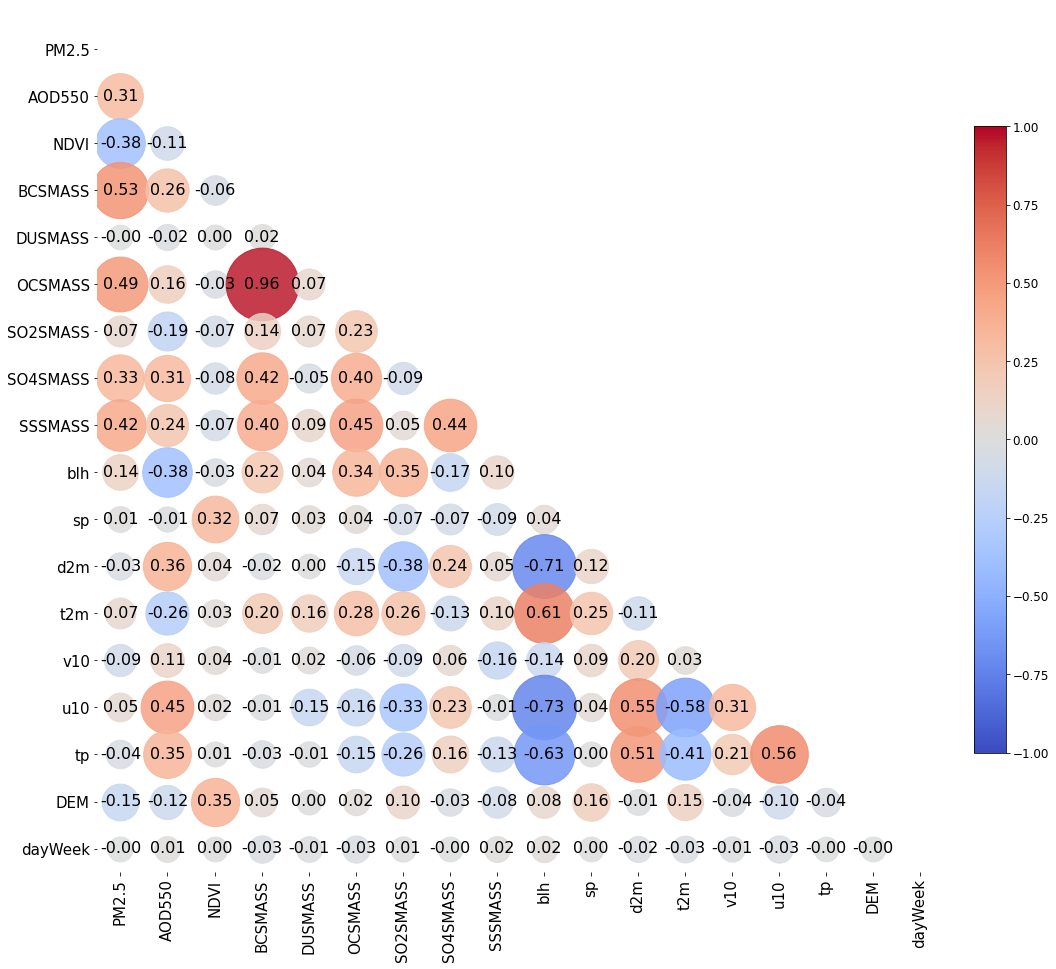

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calcular matriz de correlación
corr = data_hora.corr()

# Crear figura
fig, ax = plt.subplots(figsize=(16, 14))

labels = corr.columns
n = len(labels)

# Tamaño de los círculos
max_circle_size = 5500
min_circle_size = 600

# Colormap
cmap = plt.cm.coolwarm

# Dibujar mitad inferior
for i in range(n):
    for j in range(n):
        if i > j:
            val = corr.iloc[i, j]
            color = cmap((val + 1) / 2)
            size = np.abs(val) * (max_circle_size - min_circle_size) + min_circle_size
            ax.scatter(j, i, s=size, color=color, alpha=0.85)
            ax.text(j, i, f"{val:.2f}", ha='center', va='center', fontsize=16, color='black')

# Etiquetas
ax.set_xticks(np.arange(n))
ax.set_yticks(np.arange(n))
ax.set_xticklabels(labels, rotation=90, fontsize=15)
ax.set_yticklabels(labels, fontsize=15)

# Ajustes visuales
ax.set_xlim(-0.5, n - 0.5)
ax.set_ylim(-0.9, n - 0.5)
ax.invert_yaxis()
ax.set_aspect('equal')

# Ocultar bordes
for spine in ax.spines.values():
    spine.set_visible(False)

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=-1, vmax=1))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, shrink=0.7, pad=0.03)
cbar.ax.tick_params(labelsize=12)
# cbar.set_label('Correlación', fontsize=14)

# Título
# plt.title("Matriz de correlación (mitad inferior con círculos)", fontsize=20)

plt.tight_layout(pad=1.5)
plt.show()
